### AUTHOR: VAISHNAV KRISHNA P
#### INTERNSHIP : INTERN PE
* TASK:Task : Make a BREAST CANCER DETECTION
After that make a separate Video on it and post On LinkedIn.And Tag Internpe
This Below Video is for your reference only.
You can show your skills style in your own way DeadLine is End of this week  
* which says if the cancer is M = malignant or B = benign. 0 means the cancer is malignant and 1 means benign.

In [159]:
# importing necessory libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import pickle
import joblib
# ignoring the incompactable warnings
import warnings
warnings.filterwarnings(action="ignore")
# For train_test_split of the dataset 
from sklearn.model_selection import KFold,cross_val_score,train_test_split
# libraries for datatransformation
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Importing various classification prediction models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# for Model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [160]:
# Loading the dataset 
df = pd.read_csv("brestcancer.csv")
data = df.copy()

In [161]:
# First 5 records 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [162]:
# shape of the dataset 
df.shape 

(569, 33)

In [163]:
# information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* Most of the features are float ie,continous features
* Target feature is diagnosis 

In [164]:
# Statcitical description about the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### MISSING VALUE ANALYSIS 

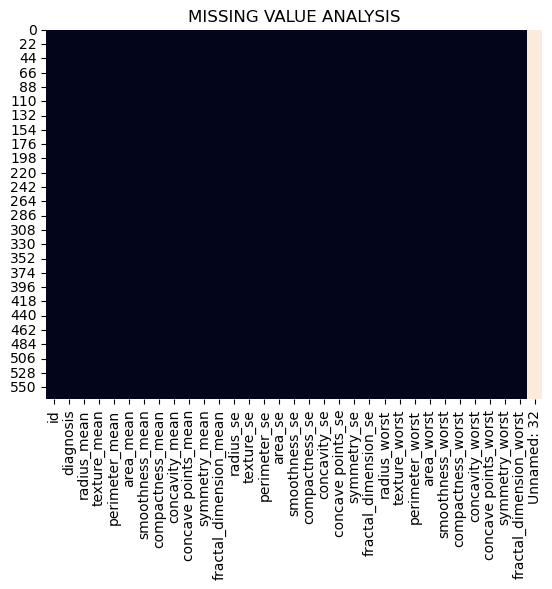

In [165]:
# Missing value heatmap 
plt.title("MISSING VALUE ANALYSIS")
sns.heatmap(df.isnull(),cbar=False)
plt.show()

* feature named Unnamed 32 is 100% missing so,we can remove the feature in later on stages 
* rest, all the features are clean 

### DATA CLEANING

In [166]:
# Removing the unwanted feature
df.drop(columns=["Unnamed: 32","id"],inplace=True)

### DATA TRANSFORMATION

In [167]:
# Encoding the categorical features 
df["diagnosis"] = df["diagnosis"].map({"M":0,"B":1})

### GROUP BY ANALYSIS

In [168]:
df.groupby("diagnosis").mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### CORELATION ANALYSIS 

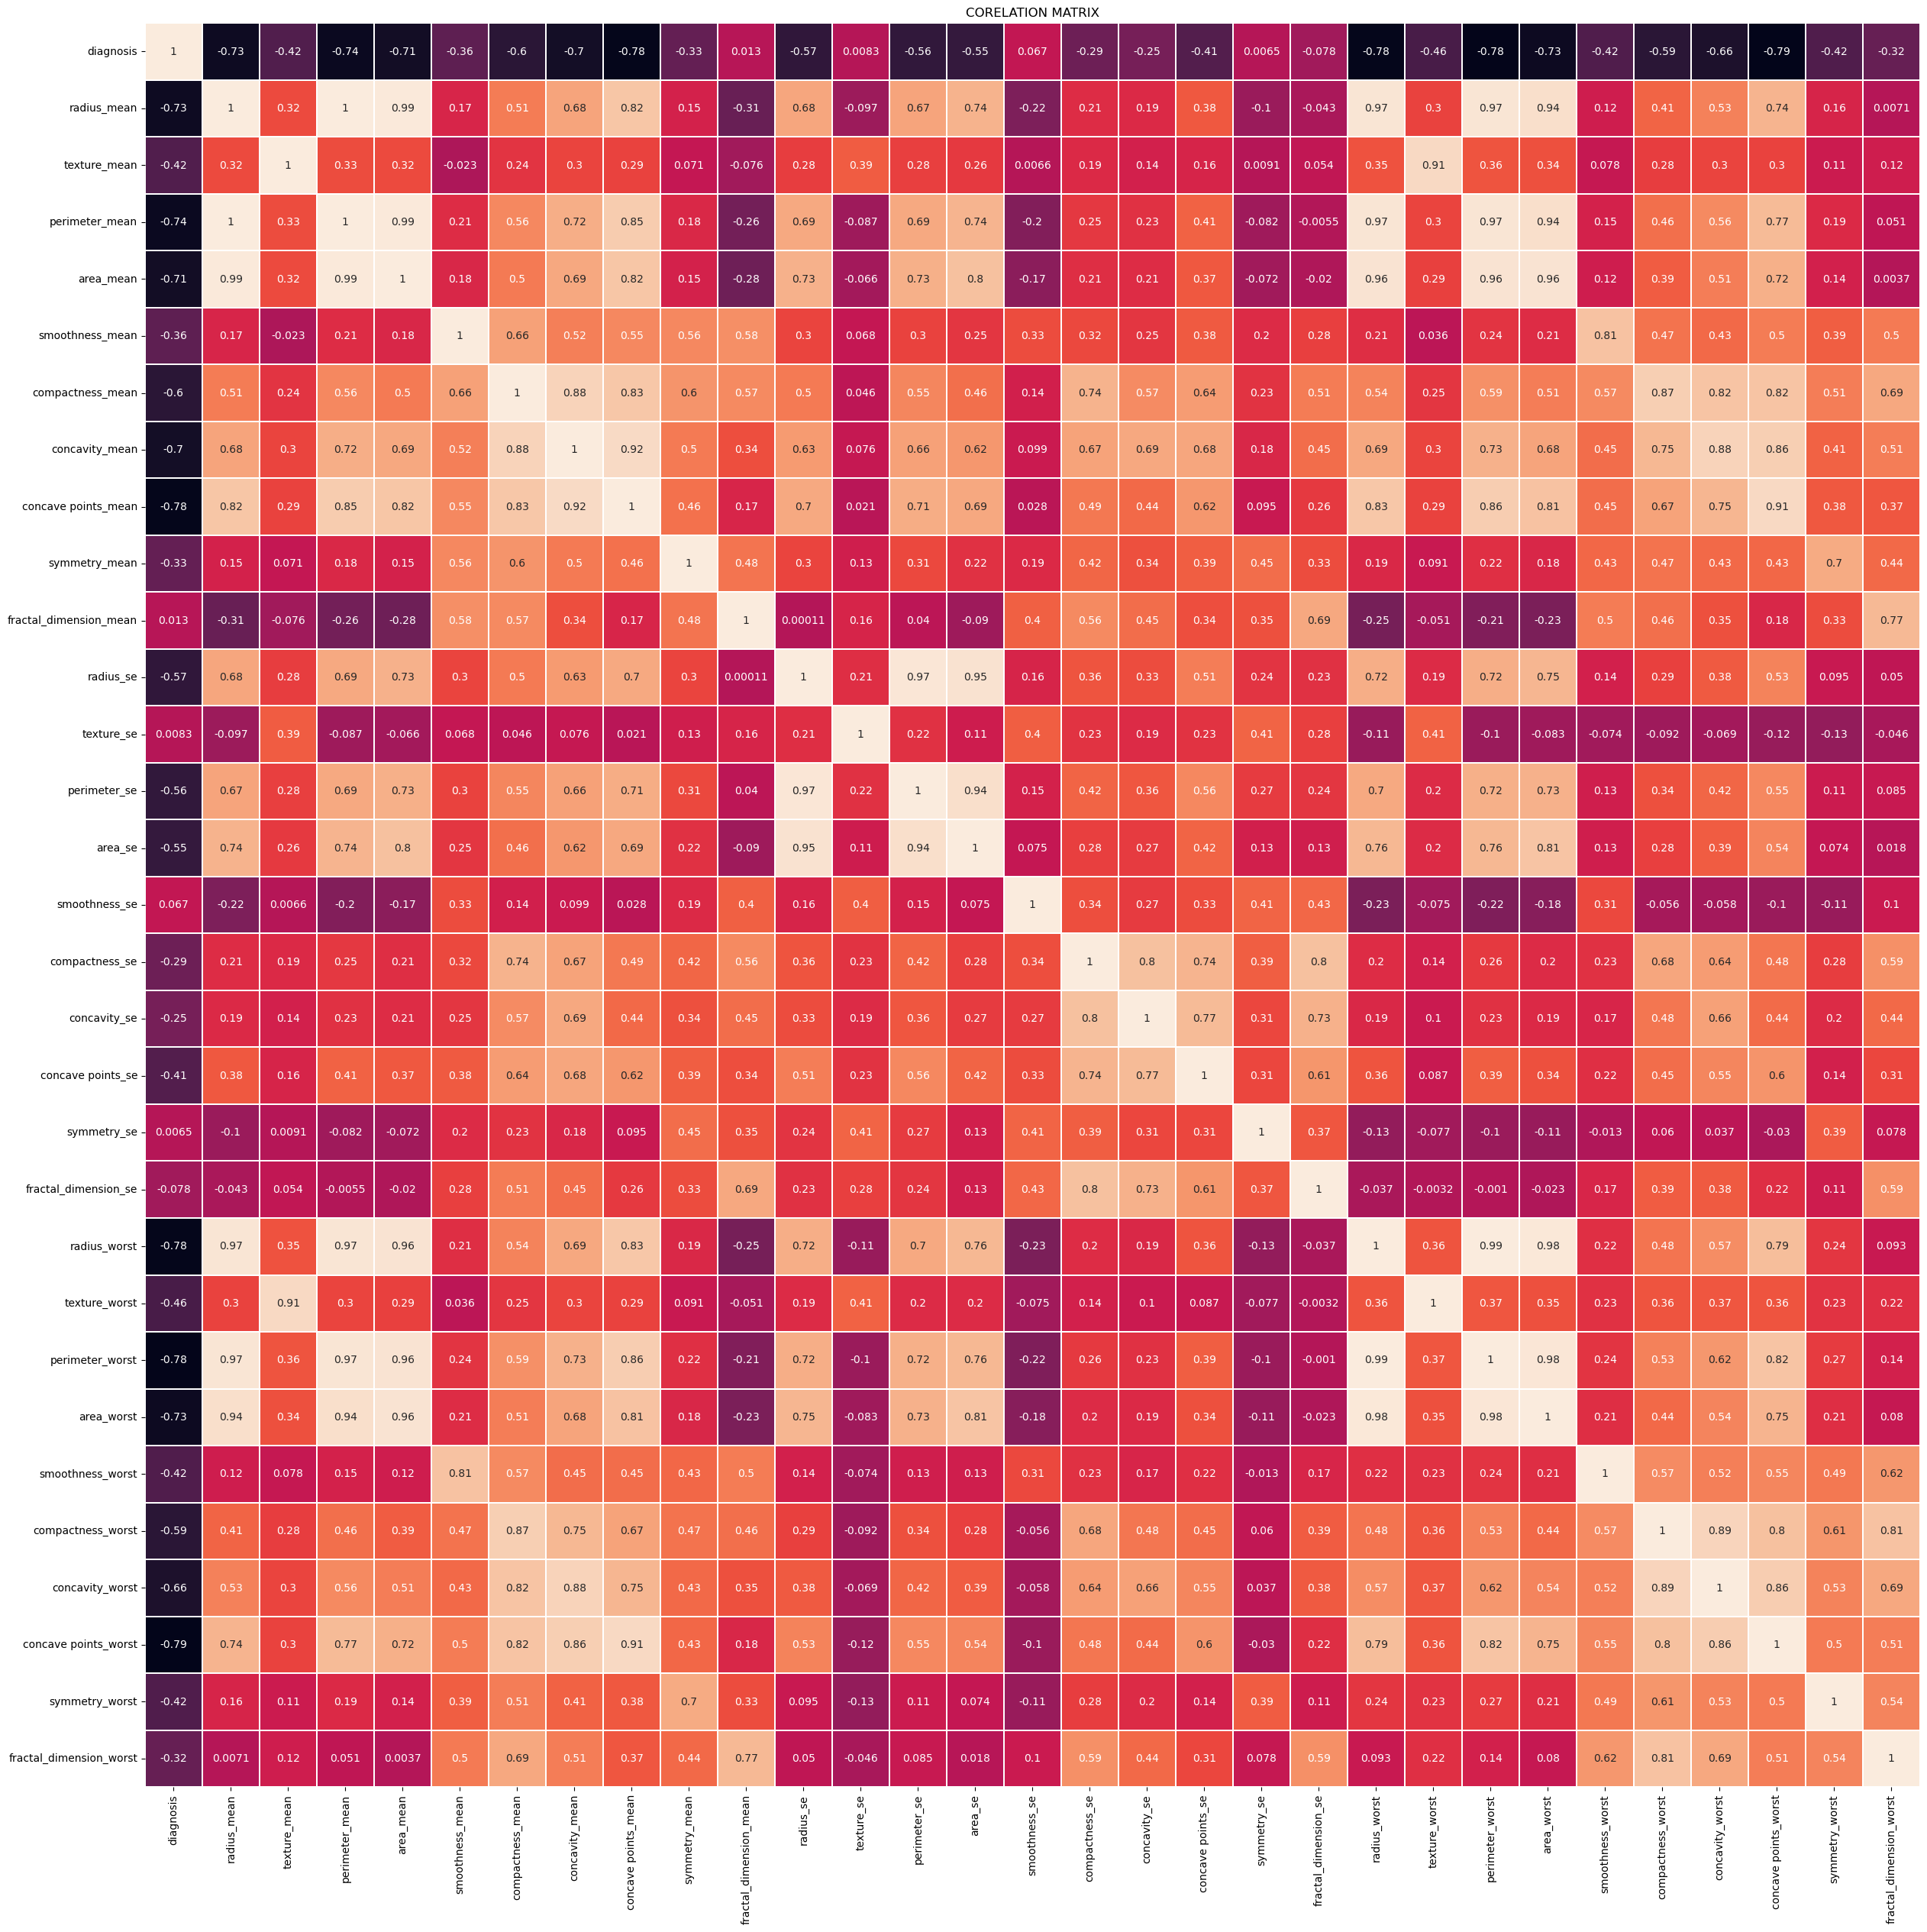

In [169]:
plt.figure(figsize=(30,30))
plt.title("CORELATION MATRIX")
sns.heatmap(df.corr(),annot=True,cbar=False,linewidth=0.2)
plt.show()

* There are so many Multicolinear features in the dataset 
1. permiter_worst - radius_mean(0.97)
2. area_worst - radius_mean(0.97)
3. radius_worst-radius_mean(0.97)
4. area_mean - radius_mean(0.97)
5. concavity_worst - concave point worst(0.88)
6. compactness_mean - compactness_worst(0.88)
7. radius_worst and area_worst --  perimeter_worst (0.97)
8. perimeter_se and area_se -- with many features 
* and many more 

### DATA REDUCTION

In [170]:
# Removing the multicolinear features 
multicolinear_features = ["radius_mean","area_se","concavity_worst","perimeter_mean","area_mean","texture_se",
                         "concavity_mean","compactness_mean","fractal_dimension_mean","concave points_worst",
                         "fractal_dimension_worst","area_worst","perimeter_worst","radius_se","texture_mean",
                         "symmetry_se","compactness_se","smoothness_mean","concavity_se","concave points_mean"
                         ,"symmetry_mean","perimeter_se"]
df.drop(columns=multicolinear_features,inplace=True)

### DATA SPLITTING

In [171]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

In [172]:
scaler = StandardScaler()
scaler = scaler.fit(X)
# dumping the model
joblib.dump(scaler,"scaler.pkl")
X = scaler.transform(X)

In [173]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [174]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 8), (114, 8), (455,), (114,))

### SPOT CHECK USING STATICAL MODELS

In [175]:
model_list = ["LogisticRegression","SVC","KNN","DTC","RFC"]
results = []
no_s = 10
kfold = KFold(n_splits=no_s)

# Training using Logistic Regression
model = LogisticRegression()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

# Training using Support vector Michine
model = SVC()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

# K neighbors classifier 
model = KNeighborsClassifier()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

# Using Decision Tree classifier
model = DecisionTreeClassifier()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

# Random Forst classifier
model = RandomForestClassifier()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

results

[0.9718045112781954,
 0.9595238095238094,
 0.9489661654135337,
 0.9261904761904762,
 0.9595551378446115]

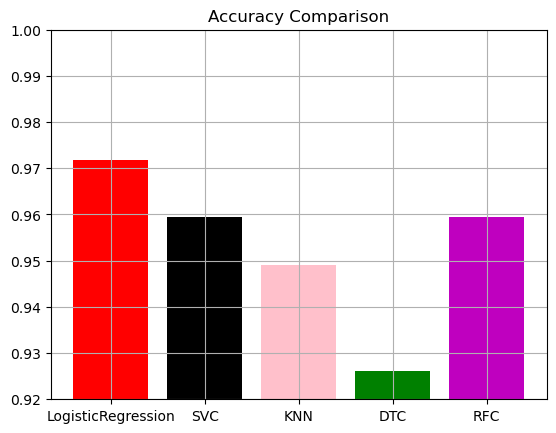

In [176]:
plt.title("Accuracy Comparison")
plt.bar(model_list,results,color=["r","k","pink","g","m"])
plt.ylim(0.92,1.0)
plt.grid(True)
plt.show()

* Got almost more than 97% accuracy. Which is very impressive
* Good accuracy by Logistic Regression

### TRAINING MODEL USING NEURAL NETWORK

In [177]:
# Creating a simple neural netwqork
prediction_model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(8,),activation="relu"),
    keras.layers.Dense(2,activation="sigmoid")
])

In [178]:
# compling the model 
prediction_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [179]:
history = prediction_model.fit(X_train,y_train,epochs=12,validation_split=0.1)

Epoch 1/12
13/13 [==============================] - 1s 17ms/step - loss: 0.7287 - accuracy: 0.4792 - val_loss: 0.6275 - val_accuracy: 0.6522
Epoch 2/12
13/13 [==============================] - 0s 4ms/step - loss: 0.5183 - accuracy: 0.8068 - val_loss: 0.4426 - val_accuracy: 0.8478
Epoch 3/12
13/13 [==============================] - 0s 4ms/step - loss: 0.3909 - accuracy: 0.9095 - val_loss: 0.3455 - val_accuracy: 0.9130
Epoch 4/12
13/13 [==============================] - 0s 4ms/step - loss: 0.3174 - accuracy: 0.9315 - val_loss: 0.2890 - val_accuracy: 0.9130
Epoch 5/12
13/13 [==============================] - 0s 5ms/step - loss: 0.2701 - accuracy: 0.9364 - val_loss: 0.2523 - val_accuracy: 0.9130
Epoch 6/12
13/13 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.9462 - val_loss: 0.2258 - val_accuracy: 0.9130
Epoch 7/12
13/13 [==============================] - 0s 4ms/step - loss: 0.2099 - accuracy: 0.9535 - val_loss: 0.2057 - val_accuracy: 0.9130
Epoch 8/12
13/13 [=

### EVALUATION OF NEURAL NETWORK

In [180]:
prediction_model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.1458 - accuracy: 0.9561


[0.14575307071208954, 0.9561403393745422]

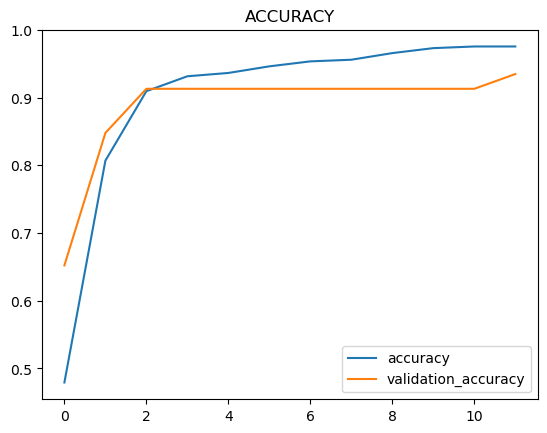

In [181]:
plt.title("ACCURACY")
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="validation_accuracy")
plt.legend()
plt.show()

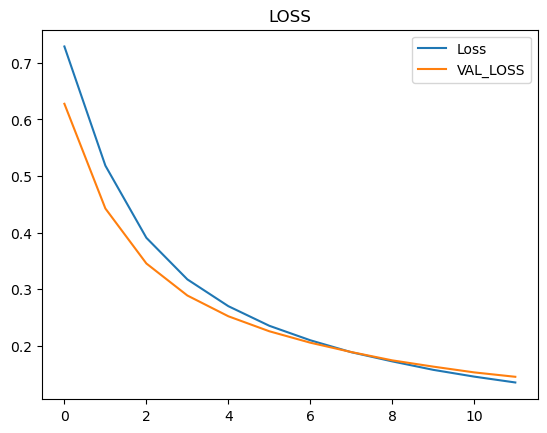

In [182]:
plt.title("LOSS")
plt.plot(history.history["loss"],label="Loss")
plt.plot(history.history["val_loss"],label="VAL_LOSS")
plt.legend()
plt.show()

* Got an accuracy of 95.6% so, this model works well
* But SVC giving more than 97% is the best suited for this task

### TRAINING OF MODEL USING SVC

In [183]:
# Training of the model using SVC 
prediction_model = SVC()
prediction_model.fit(X_test,y_test)
joblib.dump(prediction_model,"prediction_model.pkl")

['prediction_model.pkl']

### EVALUATION OF THE MODEL

In [184]:
# Prediction of the model
y_predict = prediction_model.predict(X_test)

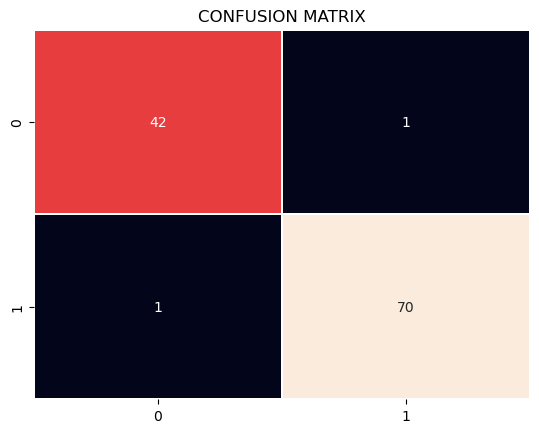

In [185]:
# CONFUSION MATRIX 
plt.title("CONFUSION MATRIX")
sns.heatmap(confusion_matrix(y_test,y_predict),cbar=False,annot=True,linewidths=0.3)
plt.xticks()
plt.show()

In [186]:
# classification report and accuracy score 
print("ACCURACY SCORE: ",accuracy_score(y_test,y_predict))
print("CLASSIFICATION REPORT: \n",classification_report(y_test,y_predict))


ACCURACY SCORE:  0.9824561403508771
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### MODEL TESTING

In [194]:
values = [0.010300,0.02454,0.004239,25.450,26.40,0.14100,0.21130,0.2060]
scaler = joblib.load("scaler.pkl")
scaled_values = scaler.transform([values])
pred_value = prediction_model.predict(scaled_values)
if pred_value == 0:
    print("The patient's cancer is classified as MALIGNANT.")
else:
    print("The patient's cancer is classified as BENIGN.")


The patient's cancer is classified as MALIGNANT.


* So,Prediction completed